### Test function development for the machine_learning.py module

In [1]:
import h5py
import numpy as np
from ramandecompy import interpolatespectra

In [9]:
key_list = interpolatespectra.keyfinder('ramandecompy/tests/test_files/test_experiment.hdf5')

In [3]:
hdf5 = h5py.File('ramandecompy/tests/test_files/test_experiment.hdf5', 'r')

In [4]:
type(hdf5['300C'])

h5py._hl.group.Group

In [5]:
type(hdf5['300C/25s'])

h5py._hl.group.Group

In [6]:
hdf5['300C/25s'].keys()

KeysView(<HDF5 group "/300C/25s" (21 members)>)

In [10]:
len(key_list)

5

A float was passed to the function, and was handled well with a TypeError.
A .txt was passed to the function, and was handled well with a TypeError.
A list was passed to the function, and was handled well with a TypeError.

A float was passed to the function, and was handled well with a TypeError.
A list not containing tuples was passed to the function,
         and was handled well with a TypeError.
A float was passed to the function, and was handled well with a TypeError.

A float was passed to the function and was handled well with a TypeError
A .txt was passed to the function and was handled well with a TypeError

A float was passed to the function and was handled well with a TypeError
A .txt was passed to the function and was handled well with a TypeError
An int was passed to the function and was handled well with a TypeError
A negative int was passed to the function and was handled well with a TypeError
A list was passed to the function and was handled well with a TypeError



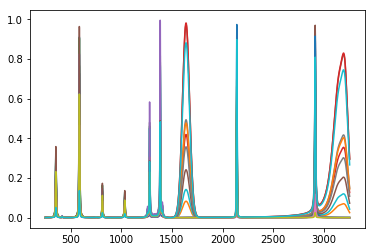

In [14]:
HDF5_FILENAME = 'ramandecompy/tests/test_files/test_calibration.hdf5'
TARGET_COMPOUND = 'water'
HDF5 = h5py.File(HDF5_FILENAME, 'r')
X_DATA = np.asarray(HDF5['{}/wavenumber'.format(TARGET_COMPOUND)])
Y_DATA = np.asarray(HDF5['{}/counts'.format(TARGET_COMPOUND)])
TUPLE_LIST = list(zip(X_DATA, Y_DATA))


def test_interp_and_norm():
    """
    A function that tests that the interpolatespectra.interp_and_norm function is behaving
    as expected.
    """
    tuple_list = interpolatespectra.interp_and_norm(HDF5_FILENAME, TARGET_COMPOUND)
    assert isinstance(tuple_list, list), '`tuple_list` is not a list'
    assert isinstance(tuple_list[0], tuple), 'first element of `tuple_list` is not a tuple'
    assert isinstance(tuple_list[0][0], np.int64), 'first element of tuple is not a np.int64'
    x_data, y_data = zip(*tuple_list)
    assert max(y_data) <= 1, 'spectra was not normalized correctly'
    try:
        interpolatespectra.interp_and_norm(4.2, TARGET_COMPOUND)
    except TypeError:
        print('A float was passed to the function, and was handled well with a TypeError.')
    try:
        interpolatespectra.interp_and_norm('hdf5.txt', TARGET_COMPOUND)
    except TypeError:
        print('A .txt was passed to the function, and was handled well with a TypeError.')
    try:
        interpolatespectra.interp_and_norm(HDF5_FILENAME, [TARGET_COMPOUND])
    except TypeError:
        print('A list was passed to the function, and was handled well with a TypeError.')

test_interp_and_norm()
print()
    
def test_apply_scaling():
    """
    A function that tests that the interpolatespectra.apply_scaling function is behaving
    as expected.
    """
    # and odd value for j means the compound should be present if i and target_index match
    j = 7
    i = 3
    target_index = 3
    scaled_tuple_list = interpolatespectra.apply_scaling(TUPLE_LIST, j, i, target_index)
    assert len(scaled_tuple_list) == len(TUPLE_LIST), 'scaled data not the same size as input data'
    assert isinstance(scaled_tuple_list, list), '`scaled_tuple_list` is not a list'
    assert isinstance(scaled_tuple_list[0], tuple), 'first element of `scaled_tuple_list` is not a tuple'
    try:
        interpolatespectra.apply_scaling(4.2, j, i, target_index)
    except TypeError:
        print('A float was passed to the function, and was handled well with a TypeError.')
    try:
        interpolatespectra.apply_scaling([1, 2, 3, 4], j, i, target_index)
    except TypeError:
        print("""A list not containing tuples was passed to the function,
         and was handled well with a TypeError.""")
    try:
        interpolatespectra.apply_scaling(TUPLE_LIST, True, i, target_index)
    except TypeError:
        print('A boolean was passed to the function, and was handled well with a TypeError.')
    try:
        interpolatespectra.apply_scaling(TUPLE_LIST, j, 3, target_index)
    except TypeError:
        print('An int was passed to the function, and was handled well with a TypeError.')
    try:
        interpolatespectra.apply_scaling(TUPLE_LIST, j, i, 4.2)
    except TypeError:
        print('A float was passed to the function, and was handled well with a TypeError.')
        
test_apply_scaling()
print()

def test_keyfinder():
    """
    A function that tests that the interpolatespectra.keyfinder function is behaving
    as expected.
    """
    hdf5_filename = 'ramandecompy/tests/test_files/test_experiment.hdf5'
    key_list = interpolatespectra.keyfinder(hdf5_filename)
    assert isinstance(key_list, list), 'expected output is not a list'
    assert isinstance(key_list[0], str), 'first element of list should be a string'
    assert len(key_list) == 5, 'number of keys in hdf5 file is incorrect'
    try:
        interpolatespectra.keyfinder(4.2)
    except TypeError:
        print('A float was passed to the function and was handled well with a TypeError')
    try:
        interpolatespectra.keyfinder('hdf5_filename.txt')
    except TypeError:
        print('A .txt was passed to the function and was handled well with a TypeError')
        
test_keyfinder()
print()

def test_generate_spectra_dataset():
    """
    A function that tests that the interpolatespectra.generate_spectra_dataset
    function is behaving as expected.
    """
    spectra_count = 20
    x_data, y_data, label = interpolatespectra.generate_spectra_dataset(HDF5_FILENAME,
                                                                        TARGET_COMPOUND,
                                                                        spectra_count)
    assert len(x_data) == 20, 'incorrect number of spectra generated (x_data)'
    assert len(y_data) == 20, 'incorrect number of spectra generated (y_data)'
    assert len(label) == 20, 'incorrect number of spectra generated (label)'
    try:
        interpolatespectra.generate_spectra_dataset(4.2,
                                                    TARGET_COMPOUND,
                                                    spectra_count)
    except TypeError:
        print('A float was passed to the function and was handled well with a TypeError')
    try:
        interpolatespectra.generate_spectra_dataset('file.txt',
                                                    TARGET_COMPOUND,
                                                    spectra_count)
    except TypeError:
        print('A .txt was passed to the function and was handled well with a TypeError')
    try:
        interpolatespectra.generate_spectra_dataset(HDF5_FILENAME,
                                                    7,
                                                    spectra_count)
    except TypeError:
        print('An int was passed to the function and was handled well with a TypeError')
    try:
        interpolatespectra.generate_spectra_dataset(HDF5_FILENAME,
                                                    TARGET_COMPOUND,
                                                    -1)
    except ValueError:
        print('A negative int was passed to the function and was handled well with a TypeError')
    try:
        interpolatespectra.generate_spectra_dataset(HDF5_FILENAME,
                                                    TARGET_COMPOUND,
                                                    [1, 2, 3])
    except TypeError:
        print('A list was passed to the function and was handled well with a TypeError')
        
test_generate_spectra_dataset()
print()

A float was passed to the function and was handled well with a TypeError
A .txt was passed to the function and was handled well with a TypeError
An int was passed to the function and was handled well with a TypeError
A negative int was passed to the function and was handled well with a TypeError
A list was passed to the function and was handled well with a TypeError


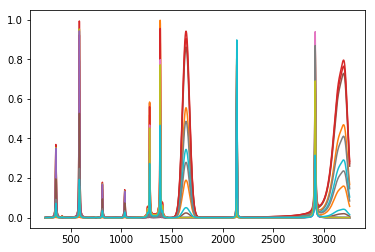